# AWS
Let's read Sentinel-2 data stored on AWS.

<div class="alert alert-info">
  
   <strong>Note:</strong> These products are not stored in the `.SAFE` format.
    
</div>

## Let's read data processed by Element84: Sentinel-2 L2A as COGs

See this [registry](https://registry.opendata.aws/sentinel-2-l2a-cogs) (`arn:aws:s3:::sentinel-cogs`)

In [1]:

# Imports
import os
import tempenv
import logging

from sertit import logs, s3
from eoreader.reader import Reader
from eoreader.bands import BLUE


2023-11-02 12:35:17,713 - [DEBUG] - Loading bands ['BLUE']
2023-11-02 12:35:17,922 - [DEBUG] - Read BLUE
2023-11-02 12:35:22,530 - [DEBUG] - Manage nodata for band BLUE
2023-11-02 12:35:22,531 - [DEBUG] - Converting BLUE to reflectance


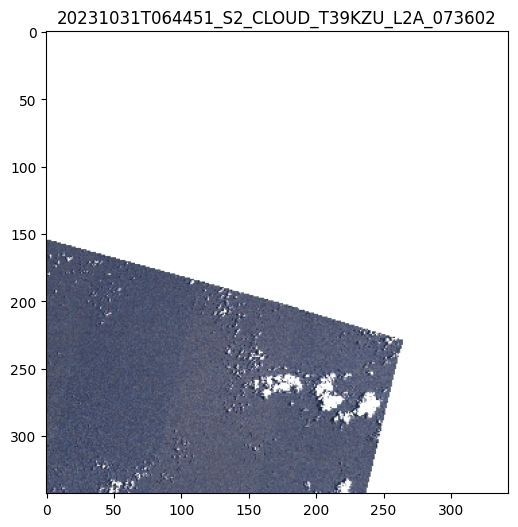

In [3]:
with tempenv.TemporaryEnvironment({
    "AWS_S3_ENDPOINT": "s3.us-west-2.amazonaws.com",
    "AWS_SECRET_ACCESS_KEY": os.getenv("AMAZON_AWS_SECRET_ACCESS_KEY"),
    "AWS_ACCESS_KEY_ID": os.getenv("AMAZON_AWS_ACCESS_KEY_ID"),
}):
    with s3.temp_s3():
        logs.init_logger(logging.getLogger("eoreader"), logging.DEBUG)
        path = r"s3://sentinel-cogs/sentinel-s2-l2a-cogs/39/K/ZU/2023/10/S2A_39KZU_20231031_0_L2A"
        prod = Reader().open(path)
        prod.plot()
        blue = prod.load(BLUE)[BLUE]

In [ ]:
blue[:, ::10, ::10].plot(cmap="Blues_r")

## Let's read data processed by Sinergise: Sentinel-2 L1C

See this [registry](https://registry.opendata.aws/sentinel-2/) (`arn:aws:s3:::sentinel-s2-l1c`)

NB: L2A would have been the same (`arn:aws:s3:::sentinel-s2-l2a`)

<div class="alert alert-info">
  
   <strong>Note:</strong> Sinergise data are stored as requester pays in AWS. Don't forget to state this when requesting data!
    
</div>

In [ ]:
with tempenv.TemporaryEnvironment({
    "AWS_S3_ENDPOINT": "s3.eu-central-1.amazonaws.com",
    "AWS_SECRET_ACCESS_KEY": os.getenv("AMAZON_AWS_SECRET_ACCESS_KEY"),
    "AWS_ACCESS_KEY_ID": os.getenv("AMAZON_AWS_ACCESS_KEY_ID"),
}):
    with s3.temp_s3(requester_pays=True):
        path = r"s3://sentinel-s2-l1c/tiles/10/S/DG/2022/7/8/0"
        prod = Reader().open(path)
        prod.plot()
        blue = prod.load(BLUE)[BLUE]